# Group 40 Project Proposal

## Introduction

**Our Topic:**
The gender pay gap is the difference between wages earned by men and women. The disparity has long been reported (Bishu & Alkadry, 2016), and many possible reasons have been cited, including the glass ceiling (lack of upward mobility for women within an organizaiton), position and agency segregation (a tendency to work in particular roles and fields), and human capital (Alkadry & Tower, 2006). The Equal Pay Act was signed by President John F.Kennedy in 1963 (Equal Pay Act of 1963) and it mandates that women should receive equal pay for doing "substantially equal" work. Over the last 50 years, numerous laws and legislation have been passed in hope to deminish the disparity. However, Statistic Canada reported that female employees in Ontario earned $0.75 for every dollars earned by men in 2020 (Statistics Canada 2022). 

In this report, we would confirm whether women are earning less than men. Our population of interest is female and male working in North America. The null hypothesis is that men and women earn the same income. We will compare the mean difference of income and standard deviation between men and women. We use the mean because we want to use the average wages of men and women and then explore the difference between them in a way that is representative of the overall trends. The standard deviation represents the variability in a gender's wages, which can help explain causes of wage disparity or highlight if disparity exists in the variability of wages or simply as an offset of the distributions. To achieve this, we used a dataset generated by scraping of Glassdoor. It contains income for various job titles based on gender. 


**Dataset**:
* Found using <a href="https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap" target="_blank">this link</a> 

* Dataset is scraped from <a href="https://www.glassdoor.com/" target="_blank">Glassdoor website</a> 



## Preliminary Results

In [3]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
library(broom)
library(digest)
library(infer)
library(gridExtra)
install.packages("lattice")
library(lattice)
install.packages("reshape2")
library(reshape2)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Load data into Jupyter notebook

In [4]:
df <- read_csv("https://raw.githubusercontent.com/kristennli/stat201/main/glassdoor.csv")

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
# The features of the data set are:
# * Job Title
# * Gender
# * Age: age in years
# * PerfEval: performance evaluation score
# * Education: level of education
# * Dept: department
# * Seniority: Seniority (No of years worked)
# * Base Pay: Annual Basic Pay in USD
# * Bonus: Annual Bonus Pay in USD

In [5]:
# display the first 6 rows of the dataset features
head(df)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


In [6]:
summary(df %>% select(BasePay,Bonus))

    BasePay           Bonus      
 Min.   : 34208   Min.   : 1703  
 1st Qu.: 76850   1st Qu.: 4850  
 Median : 93328   Median : 6507  
 Mean   : 94473   Mean   : 6467  
 3rd Qu.:111558   3rd Qu.: 8026  
 Max.   :179726   Max.   :11293  

In [7]:
# check for missing values
sum(is.na(df))

[1] 0

In [17]:
nrow(df)

[1] 1000

### EDA

The dataset consists of 1000 samples and 9 features reported by Glassdoor users and there is no missing value. The summary results for BasePay and Bonus indicate that there is a large difference for the two features. The medians and means for the two features are similar, indicating that there is no "outlier" samples in our dataset.

We first investigate if the dataset has equal representation of men and women. The sample counts between the two gender classes show that men and women are balanced in the dataset.

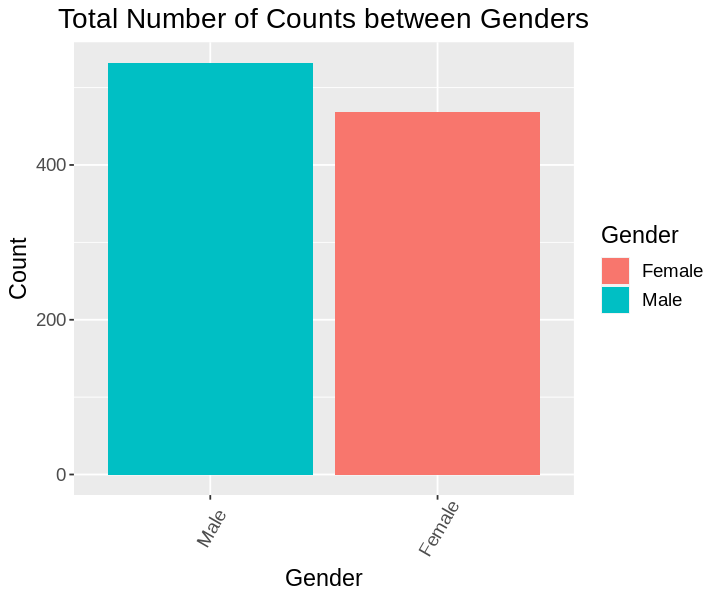

In [8]:
options(repr.plot.width = 6, repr.plot.height = 5)

# check class imbalance
gender_pop <- df %>%
    group_by(Gender) %>%
    summarise(n=n())%>%
    arrange(desc(n))

# plot the total counts of samples for the 2 genders
gender_pop <- gender_pop%>%
  ggplot(aes(x = reorder(Gender, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Gender",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of Counts between Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))


gender_pop

<font color='grey'>Figure 1: Sample Counts between Genders.</font>

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


Gender,JobTitle,n
<chr>,<chr>,<int>
Female,Data Scientist,53
Female,Driver,46
Female,Financial Analyst,49
⋮,⋮,⋮
Male,Sales Associate,51
Male,Software Engineer,101
Male,Warehouse Associate,44


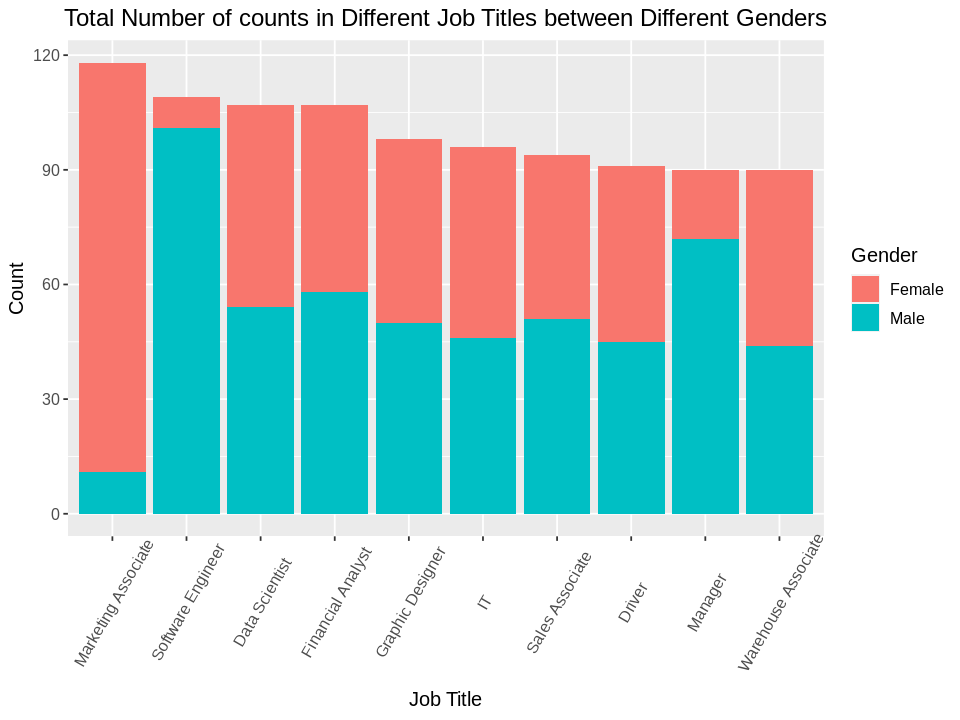

In [18]:
# Job title distribution
title <- df %>%
    group_by(Gender,JobTitle) %>%
    summarise(n=n())
title

options(repr.plot.width = 8, repr.plot.height = 6)

# plot thee different job titles for the 2 different genders
title_dist <- title %>%
    ggplot(aes(x = reorder(JobTitle, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Job Title",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Job Titles between Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 12))+
  theme(plot.title = element_text(hjust = 0.5))

title_dist

<font color='grey'>Figure 2. The total counts in different different job titles between different genders. </font>

The job title distribution of male and female shows that there is imbalance in certain fields, namely Software Markerting Associate, Enginneer and Manager. There is over-representation of women in the marketing associate positions. Conversely, there are more men who work as software engineers or hold managerial positions in this dataset.

### Feature engineering
Then we investigate the feature correlations and explore feature engineering.

In [10]:
# convert categorial features to numeric
df_mat <- data.matrix(df)
head(df_mat)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
4,1,18,5,1,4,2,42363,9938
9,2,21,5,1,3,5,108476,11128
10,1,19,4,4,1,5,90208,9268
9,2,20,5,3,5,4,108080,10154
4,2,26,5,3,2,5,99464,9319
5,1,20,5,4,4,4,70890,10126


In [11]:
# correlation matrix
corr_mat <- round(cor(df_mat),3) 
head(corr_mat)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
JobTitle,1.000,0.069,-0.017,-0.007,-0.017,-0.007,0.005,0.046,0.044
Gender,0.069,1.000,-0.029,0.067,0.062,0.004,-0.028,0.168,-0.003
Age,-0.017,-0.029,1.000,-0.057,0.020,0.047,-0.021,0.563,-0.414
PerfEval,-0.007,0.067,-0.057,1.000,0.027,0.000,-0.021,-0.054,0.855
Education,-0.017,0.062,0.020,0.027,1.000,0.000,0.016,0.142,0.054
Dept,-0.007,0.004,0.047,0.000,0.000,1.000,-0.082,0.031,-0.065


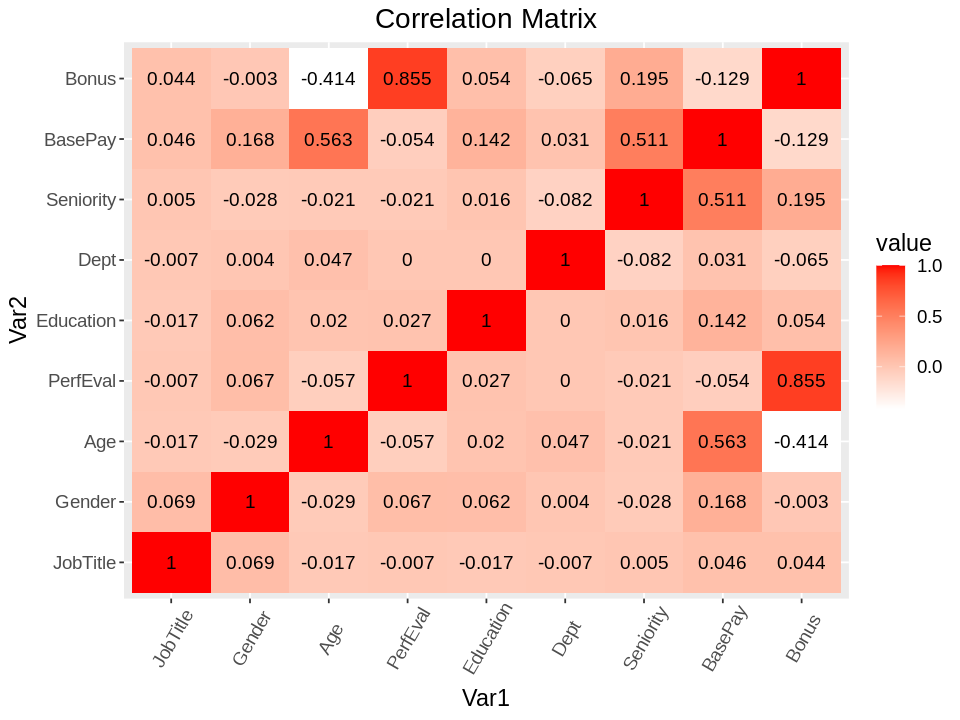

In [19]:
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
 
# plotting the correlation heatmap
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,fill=value)) +
geom_tile()+
scale_fill_gradient(low = "white", high = "red")+
ggtitle("Correlation Matrix")+
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))

<font color='grey'> Figure 3. Correlation Matrix.

According to the correlation matrix, there is a weak correlation between 'BasePay' and 'Gender'. Moreover, the performace evaluation ('PerfEval') has a strong correlation with 'Bonus'. Therefore, we will add a new column named 'income' in the dataset summing 'BasePay' and 'Bonus' to reflect the individual's annual salary.

In [13]:
# add a new column "income" to the dataframe
df_new <- df %>%
    mutate(income = BasePay + Bonus)
head(df_new)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,income
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
IT,Female,20,5,PhD,Operations,4,70890,10126,81016


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



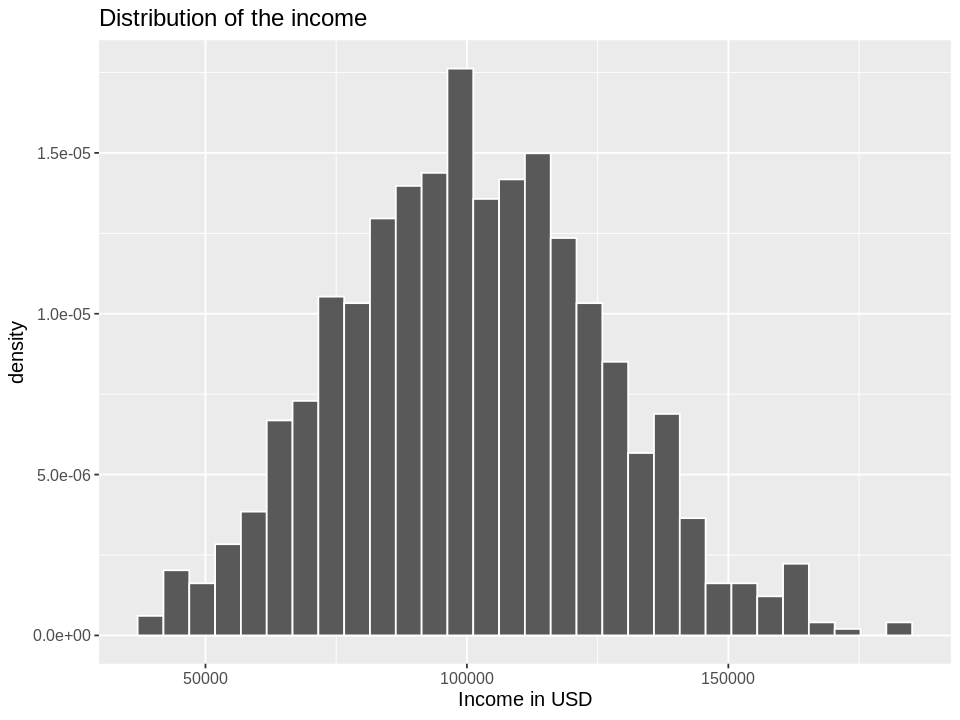

In [20]:
# check if income distribution is Normal distribution
options(repr.plot.width = 8, repr.plot.height = 6)

income_plot <- df_new %>%  
    ggplot() +
    geom_histogram(aes(income, y = ..density..), color = 'white') +
    ggtitle("Income Distribution") +
    xlab("Income in USD")+
    theme(text = element_text(size = 12))

income_plot

<font color='grey'> Figure 4. Income distribution.

The 'income' appears to be symmetrical, bell-shaped and unimodal. Figure 4 shows that the distribution of income is a Normal distribution.

In [15]:
point_estimates <- df_new |>
    group_by(Gender) |>
    summarise(mean = mean(income), standard_deviation = sd(income))

percent_diff <- (point_estimates$mean[2] -point_estimates$mean[1])/point_estimates$mean[1] 



diff_in_means = point_estimates$mean[2] -point_estimates$mean[1]


point_estimates

"difference in Means (Male - Female):"
diff_in_means
"% Difference:"
percent_diff *100


Gender,mean,standard_deviation
<chr>,<dbl>,<dbl>
Female,96416.83,24202.16
Male,104918.68,25329.57


[1] "difference in Means (Male - Female):"

[1] 8501.847

[1] "% Difference:"

[1] 8.817804

Here we  calculate the mean and standard deviation of our point estimate using the full sample, and we see that the mean male pay is ~8.8% higher than the mean female pay. The standard deviation for both genders is very similar when accounting for the difference in means.

***
Ayuho and Jennifer's section
***

## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?
- data is representative? 

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods. - sampling variation therefore need we will use 2 approaches to test our hypothesis using a sample.


Finish this section by reflecting on how your final report might play out:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to? 


Describe how are you carrying out the statistical analysis & communicate the uncertainty?

What is your point estimate? - diff in mean with SD

How do you quantify the errors of your estimates? - CI

How do you establish statistical significance of your findings?  - p-value

What do you expect to find? - reject H0

What are the potential challenges/drawbacks? - Glassdoor dataset not representative for other regions

How do you make sure your analysis is reproducible? - data provided, explanaitons labelled, setseed


 There have long been voices of inequality about income differences between men and women, and although these differences are believed to have improved today, this report will provide an opportunity to examine them in detail with various factors. Here, the various factors include performance evaluation, different departments and education level, which are important criteria for setting wages for men and women. In other words, this report is reliable because we are analyzing whether the difference in income is logically reasonable in consideration of various levels, not just by superficially grasping incomes between men and women. Also, since the dataset has 1000 data and the gender ratio is almost balanced, we could say that this report would be trustwThe gender pay gap between men and women not only reduces women's lifetime earnings, but also affects their pensions causing significant poverty in their later life. The findings will have an impact, especially on women in the world, as they will suggest whether the subsequent happiness and quality of life of women themselves will be positive or negative. Also, since we examine the income differences by taking various factors into consideration, even if the gender wage gap is confirmed, we expect to determine what factor is possibly correlated with the contribution to inequality and hope that the result will provide insights for women to advance in society.
 
 As an indicator to compare incomes between men and women, we used the average income difference as a point estimate. And the hypothesis is $H_0: \mu_1 - \mu_2 = 0$ and the alternative hypothesis is $H_1: \mu_1 - \mu_2 \neq 0$ where $\mu_1$ is the mean income of men and $\mu_2$ is the mean income of women. It is not feasible to know the actual standard deviation of the population, which would be the income difference between all men and women in North Amercia, the sample standard deviation will be used instead. In order to handle this uncertainty well, the two-sample t-test method will be used. When estimating the sampling distribution, we will use bootstrapping as well as a theoretical null model which is t-distribution. Then, we will quantify the errors of the difference between $\mu_1$ and $\mu_2$ by computing the confidence interval. Last but not least, the significant difference of income between men and women will be determined by the significance level, which is 5%. Comparing the critical value with test statistic, or p-value with significance level would give evidence to reject or not reject the null hypothesis.
 
Since society has improved in terms of gender issues, it is expected not to have enough evidence to conclude that there's a significant discrepancy of income considering other factors. Potential challenge is that the data was taken from Glassdoor which is predominately used by users in North America, and the dataset is not representative for other regions. In addition, the data dealt with in this report is from 3 years ago. Since it was the time when COVID-19 was beginning to spread and significant changes in social and economic conditions were coming, it might not correctly reflect the current society. The analysis being reproducible would not be a problem since the data we are using is fully provided and the code is all labelled with explanations. When it comes to generating random samples, setting seed would also help making the anaylsis reproducible.

## References
At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

**APA style**

Statistics Canada. (2022). Table 14-10-0324-01 Average and median gender pay ratio in annual wages, salaries and commissions [Data table]. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410032401&pickMembers%5b0%5d=1.8&cubeTimeFrame.startYear=2015&cubeTimeFrame.endYear=2019&referencePeriods=20150101%2c20190101

Bishu, S. G., & Alkadry, M. G. (2017). A Systematic Review of the Gender Pay Gap and Factors That Predict It. Administration & Society, 49(1), 65–104. https://doi.org/10.1177/0095399716636928

Alkadry, M.G. and Tower, L.E. (2006), Unequal Pay: The Role of Gender. Public Administration Review, 66: 888-898. https://doi.org/10.1111/j.1540-6210.2006.00656.x

United States. Department of Labor. Office of the Solicitor. (1963). Legislative history of the Equal Pay Act of 1963, amending section 6 of the Fair Labor Standards Act of 1938, as amended, Public Law 88-38, 88th Congress, H.R. 6060 and S. 1409. Washington :U.S. G.P.O.,